In [1]:
%matplotlib inline

import pandas as pd
import itertools as it

from pandas import DataFrame

from sklearn.decomposition import PCA

import matplotlib.cm as cm

from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import decomposition
from sklearn import datasets

from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
stars_filepath = 'review_stars_rest_subset.txt'
review_txt_filepath = 'review_text_rest_subset.txt'
business_filepath = 'review_business_rest_subset.txt'
user_filepath = 'review_user_rest_subset.txt'

In [3]:
with open(business_filepath) as f:
    business = f.readlines()
# remove whitespace characters like `\n` at the end of each line
business = [x.strip() for x in business]

In [4]:
all_bus_filepath = "collapsed_business_rest_subset.txt"

In [5]:
with open(all_bus_filepath) as f:
    all_bus = f.readlines()
# remove whitespace characters like `\n` at the end of each line
all_bus = [x.strip() for x in all_bus]

In [6]:
len(all_bus)

52810

In [7]:
bus_set = frozenset(business)
print(len(bus_set))

52810


In [8]:
lda_file = 'output_file_test_minimal_codecs_substr_b.txt'

In [9]:
lda_read = pd.io.parsers.read_csv(lda_file,sep=",", header=None)
len(lda_read)

52810

In [10]:
business_id = list(bus_set)[0:len(lda_read)]
len(business_id)

52810

In [11]:
bus_end = all_bus[len(lda_read):len(bus_set)]

In [12]:
len(bus_end)

0

In [13]:
text_file = open("collapsed_business_end.txt", "w")
for line in bus_end:
    text_file.write(str(line + '\n'))
text_file.close()

subset user datafile for top 20,000 users

In [14]:
all_user_filepath = "collapsed_user_rest_subset.txt"

In [15]:
with open(all_user_filepath) as f:
    all_user = f.readlines()
# remove whitespace characters like `\n` at the end of each line
all_user = [x.strip() for x in all_user]

In [16]:
len(all_user)

169373

In [17]:
user_sub = all_user[0:20000]

In [18]:
text_file = open("collapsed_user_20000.txt", "w")
for line in user_sub:
    text_file.write(str(line + '\n'))
text_file.close()

In [19]:
lda_read.head()

0       1       2       3    4    5       6       7    8       9   \
0  0.0000  0.0000  0.0000  0.0623  0.0  0.0  0.0000  0.0000  0.0  0.0000   
1  0.2733  0.1195  0.1067  0.0000  0.0  0.0  0.0000  0.0000  0.0  0.0461   
2  0.0000  0.0221  0.1126  0.0000  0.0  0.0  0.0000  0.0000  0.0  0.0190   
3  0.0000  0.0140  0.0000  0.0000  0.0  0.0  0.0412  0.0468  0.0  0.0116   
4  0.0000  0.1261  0.0000  0.0000  0.0  0.0  0.0000  0.0000  0.0  0.0668   

    ...        40     41   42      43      44      45      46      47   48  \
0   ...    0.0000  0.000  0.0  0.0171  0.0276  0.0000  0.0593  0.0886  0.0   
1   ...    0.0000  0.044  0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0   
2   ...    0.0000  0.000  0.0  0.0000  0.0214  0.0000  0.0000  0.0279  0.0   
3   ...    0.0000  0.000  0.0  0.0000  0.0281  0.1107  0.0000  0.0156  0.0   
4   ...    0.2102  0.000  0.0  0.0000  0.0138  0.0000  0.0165  0.0000  0.0   

       49  
0  0.1217  
1  0.0000  
2  0.0601  
3  0.0000  
4  0.1548  

[5 rows x 50 columns]

In [20]:
lda_read.insert(0, 'business_id',business_id)

In [21]:
lda_read.head()

business_id       0       1       2       3    4    5       6  \
0  MDInVOKvIetk_OIpKd2Ofw  0.0000  0.0000  0.0000  0.0623  0.0  0.0  0.0000   
1  LaSI4hTI5EZ2DfcSvE0uWw  0.2733  0.1195  0.1067  0.0000  0.0  0.0  0.0000   
2  B9W60PTxn7XOZfk4BiTvyw  0.0000  0.0221  0.1126  0.0000  0.0  0.0  0.0000   
3  -7PX_FOoCwktlunImRyZdg  0.0000  0.0140  0.0000  0.0000  0.0  0.0  0.0412   
4  YM0eGFRw4Sio8qBlcIYFoA  0.0000  0.1261  0.0000  0.0000  0.0  0.0  0.0000   

        7    8   ...        40     41   42      43      44      45      46  \
0  0.0000  0.0   ...    0.0000  0.000  0.0  0.0171  0.0276  0.0000  0.0593   
1  0.0000  0.0   ...    0.0000  0.044  0.0  0.0000  0.0000  0.0000  0.0000   
2  0.0000  0.0   ...    0.0000  0.000  0.0  0.0000  0.0214  0.0000  0.0000   
3  0.0468  0.0   ...    0.0000  0.000  0.0  0.0000  0.0281  0.1107  0.0000   
4  0.0000  0.0   ...    0.2102  0.000  0.0  0.0000  0.0138  0.0000  0.0165   

       47   48      49  
0  0.0886  0.0  0.1217  
1  0.0000  0.0  0.0000  
2  0.0279  0.0  0.0601  
3  0.0156  0.0  0.0000  
4  0.0000  0.0  0.1548  

[5 rows x 51 columns]

In [22]:
topic_names = {0: u'chinese',
               1: u'thai',
               2: u'healthy',
               3: u'smell',
               4: u'japanese',
               5: u'toronto',
               6: u'service',
               7: u'experience',
               8: u'asian soup',
               9: u'grocery',
               10: u'parking',
               11: u'bar ambiance',
               12: u'uk',
               13: u'good service',
               14: u'fun ambiance',
               15: u'young',
               16: u'comfort food',
               17: u'greek',
               18: u'high end',
               19: u'hotwing',
               20: u'breakfast',
               21: u'sweet',
               22: u'wine & dine',
               23: u'pubs',
               24: u'good taste',
               25: u'na drinks',
               26: u'desserts',
               27: u'coffee shop',
               28: u'mexican',
               29: u'reviews',
               30: u'new york',
               31: u'general restaurant',
               32: u'beach',
               33: u'location',
               34: u'happy hour',
               35: u'amazing',
               36: u'vietnamese',
               37: u'time',
               38: u'vas legas',
               39: u'montreal',
               40: u'deli',
               41: u'buffet',
               42: u'bbq',
               43: u'french',
               44: u'money',
               45: u'street taco',
               46: u'pizza',
               47: u'airport & delivery',
               48: u'burger & fries',
               49: u'italian'}

In [23]:
all_numbers = list(range(0,50))

df_topics = pd.DataFrame(columns =["topic_name"])

for topic_number in all_numbers:
    df_topics = df_topics.append({
     "topic_name": topic_names[topic_number]
      }, ignore_index=True)
#print(df_topics)

In [24]:
clmns = df_topics['topic_name'].tolist()

In [25]:
clmns

['chinese',
 'thai',
 'healthy',
 'smell',
 'japanese',
 'toronto',
 'service',
 'experience',
 'asian soup',
 'grocery',
 'parking',
 'bar ambiance',
 'uk',
 'good service',
 'fun ambiance',
 'young',
 'comfort food',
 'greek',
 'high end',
 'hotwing',
 'breakfast',
 'sweet',
 'wine & dine',
 'pubs',
 'good taste',
 'na drinks',
 'desserts',
 'coffee shop',
 'mexican',
 'reviews',
 'new york',
 'general restaurant',
 'beach',
 'location',
 'happy hour',
 'amazing',
 'vietnamese',
 'time',
 'vas legas',
 'montreal',
 'deli',
 'buffet',
 'bbq',
 'french',
 'money',
 'street taco',
 'pizza',
 'airport & delivery',
 'burger & fries',
 'italian']

In [26]:
all_cols =  clmns
all_cols.insert(0,'business_id')
#print(all_cols)

In [27]:
#clmns = df_topics['topic_name'].tolist()

In [28]:
lda_read.head()

business_id       0       1       2       3    4    5       6  \
0  MDInVOKvIetk_OIpKd2Ofw  0.0000  0.0000  0.0000  0.0623  0.0  0.0  0.0000   
1  LaSI4hTI5EZ2DfcSvE0uWw  0.2733  0.1195  0.1067  0.0000  0.0  0.0  0.0000   
2  B9W60PTxn7XOZfk4BiTvyw  0.0000  0.0221  0.1126  0.0000  0.0  0.0  0.0000   
3  -7PX_FOoCwktlunImRyZdg  0.0000  0.0140  0.0000  0.0000  0.0  0.0  0.0412   
4  YM0eGFRw4Sio8qBlcIYFoA  0.0000  0.1261  0.0000  0.0000  0.0  0.0  0.0000   

        7    8   ...        40     41   42      43      44      45      46  \
0  0.0000  0.0   ...    0.0000  0.000  0.0  0.0171  0.0276  0.0000  0.0593   
1  0.0000  0.0   ...    0.0000  0.044  0.0  0.0000  0.0000  0.0000  0.0000   
2  0.0000  0.0   ...    0.0000  0.000  0.0  0.0000  0.0214  0.0000  0.0000   
3  0.0468  0.0   ...    0.0000  0.000  0.0  0.0000  0.0281  0.1107  0.0000   
4  0.0000  0.0   ...    0.2102  0.000  0.0  0.0000  0.0138  0.0000  0.0165   

       47   48      49  
0  0.0886  0.0  0.1217  
1  0.0000  0.0  0.0000  
2  0.0279  0.0  0.0601  
3  0.0156  0.0  0.0000  
4  0.0000  0.0  0.1548  

[5 rows x 51 columns]

In [29]:
lda_read.columns = all_cols

In [30]:
lda_read

business_id  chinese    thai  healthy   smell  japanese  \
0      MDInVOKvIetk_OIpKd2Ofw   0.0000  0.0000   0.0000  0.0623    0.0000   
1      LaSI4hTI5EZ2DfcSvE0uWw   0.2733  0.1195   0.1067  0.0000    0.0000   
2      B9W60PTxn7XOZfk4BiTvyw   0.0000  0.0221   0.1126  0.0000    0.0000   
3      -7PX_FOoCwktlunImRyZdg   0.0000  0.0140   0.0000  0.0000    0.0000   
4      YM0eGFRw4Sio8qBlcIYFoA   0.0000  0.1261   0.0000  0.0000    0.0000   
5      IO2W0wnHuL7P4KgvEFWnsw   0.0000  0.0254   0.0000  0.0000    0.0000   
6      NECnXyZ8SCjQICOBhG7wTg   0.0273  0.0104   0.0159  0.0000    0.0000   
7      xACB9ICHolISiKH_qTU_1w   0.2510  0.2960   0.0000  0.0000    0.0000   
8      fcyk-PZKRqo4EUJ0vH1aNg   0.0441  0.2584   0.0156  0.0000    0.0000   
9      xBlHvE-5M5zdlWCftk5_tw   0.0000  0.0674   0.0000  0.0000    0.0574   
10     rDt7Bz9Mare4ZfmxQcBD0g   0.0109  0.0000   0.0000  0.0000    0.0000   
11     zJGtD3y-pAIGNId4codEEg   0.0000  0.0000   0.0000  0.0000    0.0000   
12     DeoLBmoxGVWGTfXAKLW5jA   0.0688  0.2512   0.0000  0.0000    0.0000   
13     kYezxBTjUC49pva5HLPKbg   0.0000  0.0000   0.0414  0.0000    0.0000   
14     2YDCiSR77FZV5_L0UcaGbA   0.0302  0.0549   0.0259  0.0000    0.0000   
15     C-lAQbNBuXPGeoPWB0_V5A   0.0000  0.0136   0.0146  0.0000    0.0000   
16     VUIkepUdEJRmFCI72DtdZw   0.0000  0.0288   0.0000  0.0000    0.0000   
17     Dg77S06OK52nadXzf9KvHA   0.0000  0.0000   0.0000  0.0000    0.0000   
18     F3JfTKaytuIXQHwLcQfNug   0.0000  0.0000   0.0000  0.0000    0.0000   
19     M6sS5Llw0FnJu1J3b78WOg   0.0000  0.0214   0.1913  0.0000    0.0000   
20     BY9JxpTr9XAHJcgOMccz1A   0.3213  0.0278   0.0000  0.0000    0.0000   
21     2bXyG9i01EjS9ttdnXToDw   0.0000  0.0823   0.0533  0.0341    0.0000   
22     6_f_Yae3eS2A4HefYfCfAA   0.0366  0.0000   0.0000  0.0555    0.0000   
23     Ha83c9FSnVxUj7DA_1m53w   0.0000  0.0000   0.0000  0.0000    0.0000   
24     6z8izreEJW6bSAmBBwdPdA   0.0000  0.0000   0.0581  0.0000    0.0000   
25     ATxTB7_NGg9e2HVyD-tGVw   0.3741  0.0132   0.0124  0.0000    0.0000   
26     00I_YBjgZAvd2ggZr3J0cQ   0.0000  0.0000   0.0172  0.0000    0.0000   
27     ggqmML5wN5RFv5QtHQw4iA   0.0000  0.0212   0.0000  0.0145    0.0000   
28     Nt0NSU6z_tfK0EQlGpK0Zg   0.0000  0.0000   0.0000  0.0261    0.0000   
29     iYzjrO27y9ew0HgNwYZiUQ   0.0000  0.0000   0.0163  0.0101    0.0000   
...                       ...      ...     ...      ...     ...       ...   
52780  M9fOuiesoUSaouOqNQ3U2w   0.0000  0.0000   0.0000  0.0000    0.0000   
52781  IpPg0WIJFGuEahTM55e4pA   0.0000  0.0000   0.0213  0.0000    0.0000   
52782  qfOdKsHejg346k_B7MmmuQ   0.0000  0.0000   0.0000  0.0000    0.0000   
52783  61Do3_JKSyzUr3T3nZRROQ   0.2220  0.0749   0.0125  0.0000    0.0000   
52784  qQvHYQ1uocuEnFcUdhxV_g   0.0000  0.0109   0.0000  0.0000    0.0000   
52785  YCm7wypibp04buWh-jRRpg   0.4229  0.0433   0.0000  0.0000    0.0000   
52786  QIvn4fWw2bE53kgePK7oEQ   0.0238  0.0000   0.0000  0.0000    0.0000   
52787  YsLj_h4ctlV0iDSykB6pRg   0.0000  0.0000   0.0000  0.0000    0.0000   
52788  x5vSE0-NO_YSZtOnitLWuQ   0.0217  0.0265   0.0000  0.0000    0.0138   
52789  GRlucCzB0Jg4VC_A_KCgZw   0.0000  0.0000   0.0000  0.0000    0.0000   
52790  vSB8Yrz0KslzqnlPEBfqNA   0.0000  0.0000   0.0000  0.0000    0.0000   
52791  6j67nog58__bFPqd620Rrw   0.0816  0.0000   0.0000  0.0000    0.2871   
52792  pbCpZkOuLjr7sdiAdxw1EA   0.0000  0.0000   0.0000  0.0000    0.0000   
52793  j6BfGByroCB585NPUnIHBg   0.0000  0.0115   0.0000  0.0000    0.0000   
52794  fFKkuE9hB7g98xATUfMkiw   0.0000  0.0416   0.0000  0.0000    0.0000   
52795  tHLJ1pDaaHptb-EbFM2q_A   0.0000  0.0595   0.0000  0.0000    0.0242   
52796  uA9tzuzID3t5yZ8rhZ1bQw   0.0000  0.0000   0.0000  0.0000    0.0000   
52797  9DIbfGYvKnEetNA8ntZoLg   0.0000  0.0000   0.0000  0.0000    0.0000   
52798  98V9R-7YT20KmcmJyMiJmg   0.0000  0.0000   0.0000  0.0000    0.0000   
52799  IxAPxAC3Tb13IFg-Qjhppg   0.0795  0.1507   0.0168  0.0000    0.0106   
52800  -vaqW1U

In [31]:
clmns = df_topics['topic_name'].tolist()

In [32]:
lda_read[clmns]

chinese    thai  healthy   smell  japanese  toronto  service  \
0       0.0000  0.0000   0.0000  0.0623    0.0000   0.0000   0.0000   
1       0.2733  0.1195   0.1067  0.0000    0.0000   0.0000   0.0000   
2       0.0000  0.0221   0.1126  0.0000    0.0000   0.0000   0.0000   
3       0.0000  0.0140   0.0000  0.0000    0.0000   0.0000   0.0412   
4       0.0000  0.1261   0.0000  0.0000    0.0000   0.0000   0.0000   
5       0.0000  0.0254   0.0000  0.0000    0.0000   0.0000   0.0000   
6       0.0273  0.0104   0.0159  0.0000    0.0000   0.0000   0.2893   
7       0.2510  0.2960   0.0000  0.0000    0.0000   0.0000   0.1908   
8       0.0441  0.2584   0.0156  0.0000    0.0000   0.0000   0.0424   
9       0.0000  0.0674   0.0000  0.0000    0.0574   0.0000   0.0000   
10      0.0109  0.0000   0.0000  0.0000    0.0000   0.0000   0.1571   
11      0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0745   
12      0.0688  0.2512   0.0000  0.0000    0.0000   0.0000   0.1476   
13      0.0000  0.0000   0.0414  0.0000    0.0000   0.0000   0.2866   
14      0.0302  0.0549   0.0259  0.0000    0.0000   0.0000   0.0000   
15      0.0000  0.0136   0.0146  0.0000    0.0000   0.0000   0.0315   
16      0.0000  0.0288   0.0000  0.0000    0.0000   0.0000   0.0000   
17      0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0877   
18      0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0760   
19      0.0000  0.0214   0.1913  0.0000    0.0000   0.0000   0.0333   
20      0.3213  0.0278   0.0000  0.0000    0.0000   0.0201   0.0422   
21      0.0000  0.0823   0.0533  0.0341    0.0000   0.0000   0.0000   
22      0.0366  0.0000   0.0000  0.0555    0.0000   0.0000   0.0875   
23      0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.1195   
24      0.0000  0.0000   0.0581  0.0000    0.0000   0.0000   0.0000   
25      0.3741  0.0132   0.0124  0.0000    0.0000   0.0000   0.1515   
26      0.0000  0.0000   0.0172  0.0000    0.0000   0.0000   0.0000   
27      0.0000  0.0212   0.0000  0.0145    0.0000   0.0000   0.1991   
28      0.0000  0.0000   0.0000  0.0261    0.0000   0.0000   0.1895   
29      0.0000  0.0000   0.0163  0.0101    0.0000   0.0000   0.0125   
...        ...     ...      ...     ...       ...      ...      ...   
52780   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.1173   
52781   0.0000  0.0000   0.0213  0.0000    0.0000   0.0000   0.1212   
52782   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0296   
52783   0.2220  0.0749   0.0125  0.0000    0.0000   0.0000   0.0501   
52784   0.0000  0.0109   0.0000  0.0000    0.0000   0.0000   0.2815   
52785   0.4229  0.0433   0.0000  0.0000    0.0000   0.0293   0.0365   
52786   0.0238  0.0000   0.0000  0.0000    0.0000   0.0000   0.0425   
52787   0.0000  0.0000   0.0000  0.0000    0.0000   0.0161   0.0000   
52788   0.0217  0.0265   0.0000  0.0000    0.0138   0.0000   0.0000   
52789   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0572   
52790   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.0799   
52791   0.0816  0.0000   0.0000  0.0000    0.2871   0.0000   0.1450   
52792   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.1127   
52793   0.0000  0.0115   0.0000  0.0000    0.0000   0.0000   0.3395   
52794   0.0000  0.0416   0.0000  0.0000    0.0000   0.0000   0.1168   
52795   0.0000  0.0595   0.0000  0.0000    0.0242   0.0000   0.0264   
52796   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.1355   
52797   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.2079   
52798   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.2241   
52799   0.0795  0.1507   0.0168  0.0000    0.0106   0.0000   0.0194   
52800   0.0278  0.0000   0.0000  0.0000    0.0000   0.0000   0.0000   
52801   0.0000  0.0000   0.0000  0.0000    0.0000   0.0000   0.1598   
52802   0.0000  0.0121   0.0000  0.0000    0.0000   0.0000   0.0279   
52803   0.0597  0.0000   0.0000  0.0000    0.0595   0.0000   0.0000   
52804   0.0000  0.0000   0.0000

In [33]:
X=lda_read[clmns]

In [34]:
pca = PCA(n_components=5)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

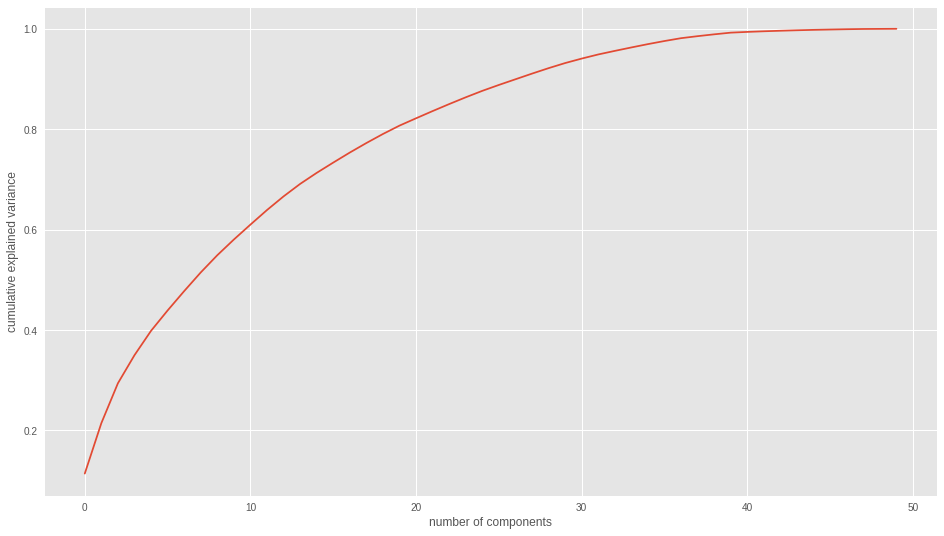

In [35]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [31]:
X.shape


(52810, 50)

In [32]:
pca = PCA(2)  # project from 50 to 2 dimensions
projected = pca.fit_transform(X)

In [88]:
pca3 = PCA(3)  # project from 50 to 3 dimensions
projected3 = pca3.fit_transform(X)

In [90]:
pca4 = PCA(4)  # project from 50 to 4 dimensions
projected4 = pca4.fit_transform(X)

In [91]:
pca5 = PCA(5)  # project from 50 to 5 dimensions
projected5 = pca5.fit_transform(X)

In [92]:
pca10 = PCA(10)  # project from 50 to 10 dimensions
projected10 = pca10.fit_transform(X)

In [93]:
pca20 = PCA(20)  # project from 50 to 20 dimensions
projected20 = pca20.fit_transform(X)

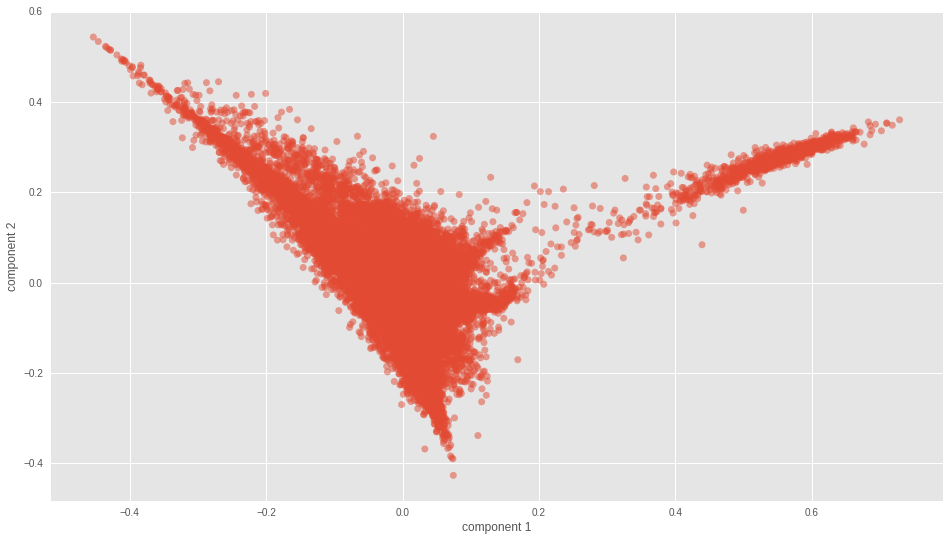

In [33]:
plt.scatter(projected[:, 0], projected[:, 1],
         edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [34]:
projected[1]

array([ 0.02718143, -0.16791745])

In [35]:
projected_df = pd.DataFrame(projected)

In [36]:
projected_df.shape

(52810, 2)

In [37]:
lda_std = stats.zscore(lda_read[clmns])

In [38]:
lda_std.shape

(52810, 50)

In [74]:
X = lda_std

In [75]:
len(X)

52810

In [76]:
X = X[:20000]

In [77]:
len(X)

20000

In [78]:
range_n_clusters = [2, 3, 4, 5, 6, 10]

For n_clusters = 2 The average silhouette_score is : 0.1819326672279445


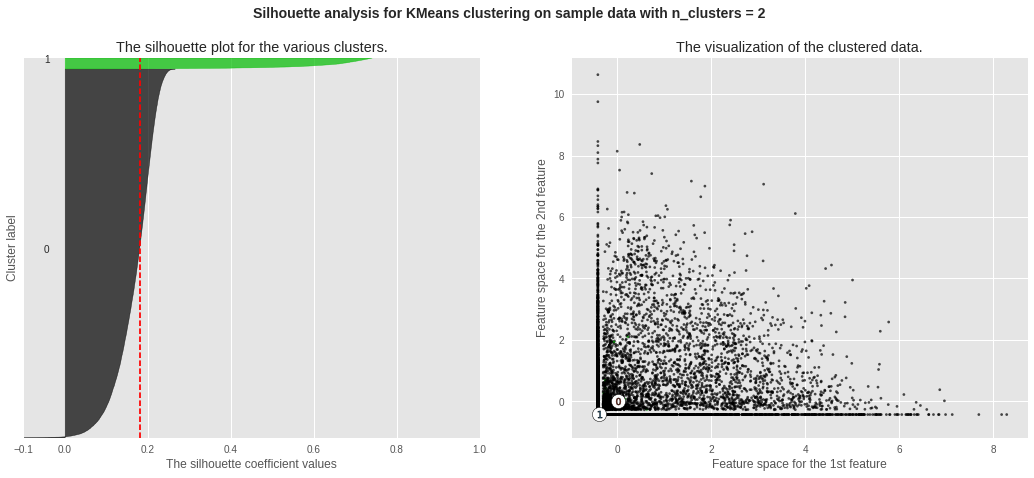

For n_clusters = 3 The average silhouette_score is : 0.042006708287210495


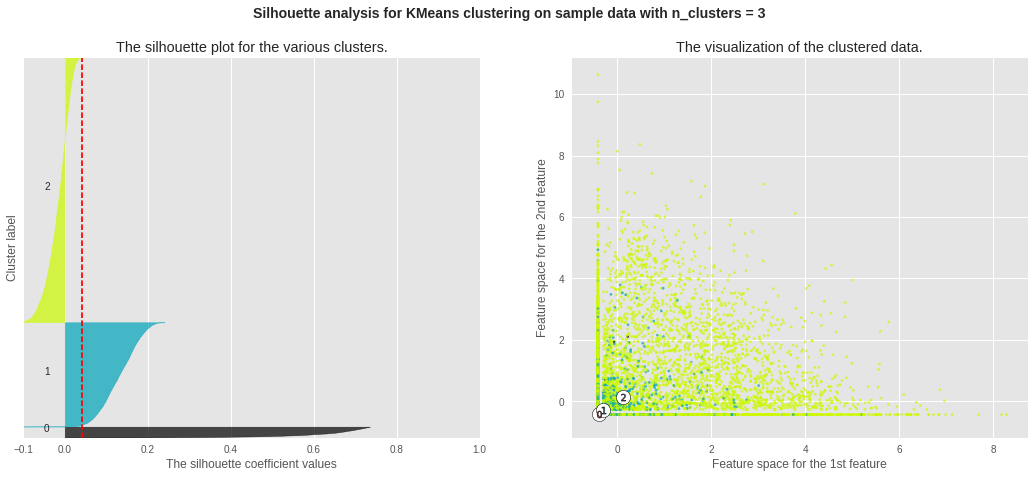

For n_clusters = 4 The average silhouette_score is : 0.04825494351501721


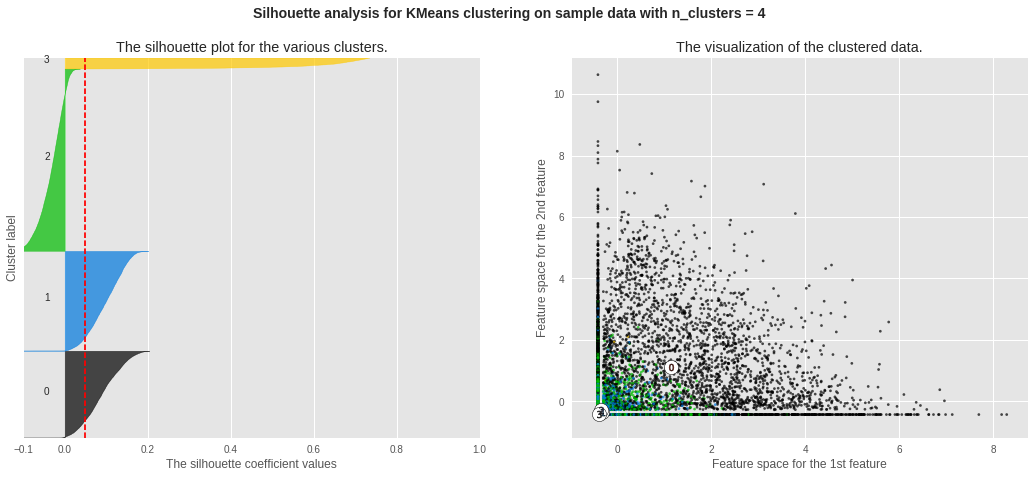

For n_clusters = 5 The average silhouette_score is : 0.058201372749976665


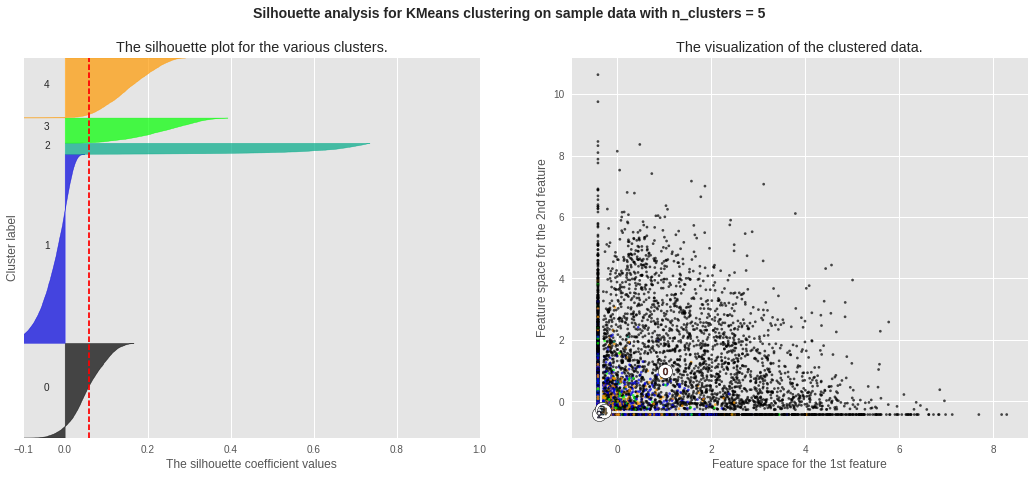

For n_clusters = 6 The average silhouette_score is : 0.06064023985627191


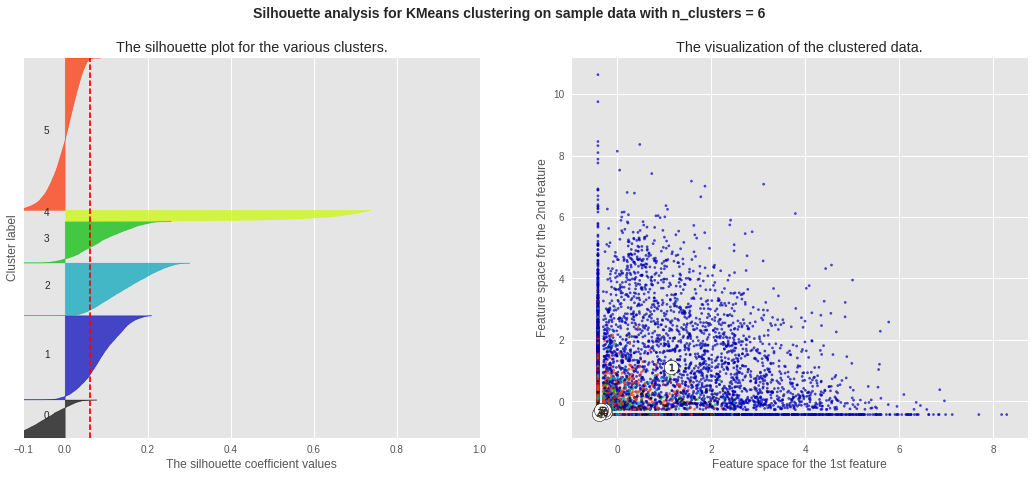

For n_clusters = 10 The average silhouette_score is : 0.09365215515591316


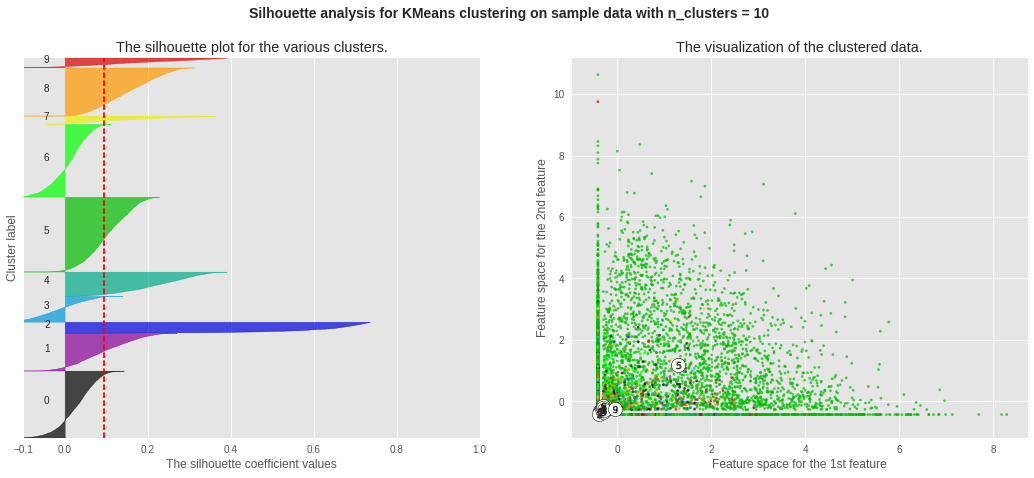

In [79]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [80]:
X = projected_df.as_matrix()

In [81]:
X = X[:20000]

In [82]:
len(X)

20000

In [83]:
X[1]

array([ 0.02718143, -0.16791745])

For n_clusters = 2 The average silhouette_score is : 0.8049455680146713


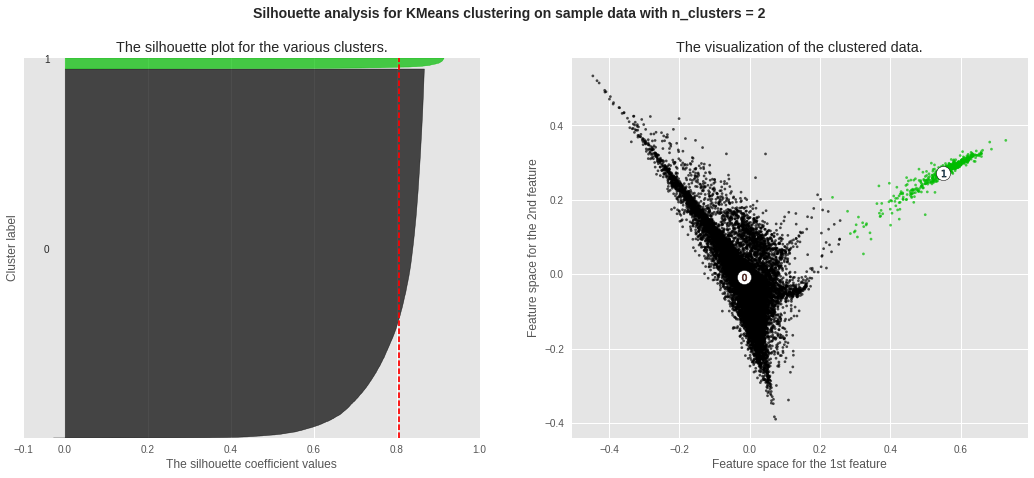

For n_clusters = 3 The average silhouette_score is : 0.5646571258102683


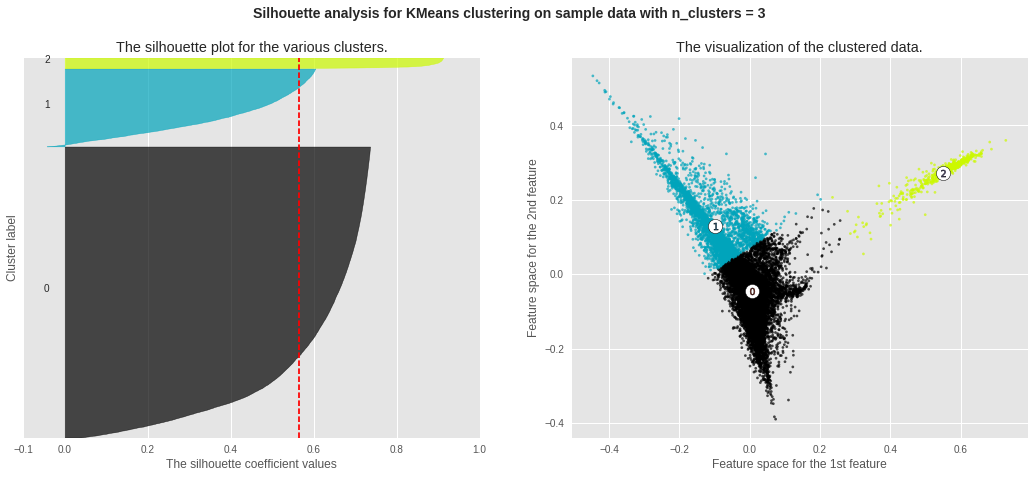

For n_clusters = 4 The average silhouette_score is : 0.4252079704771255


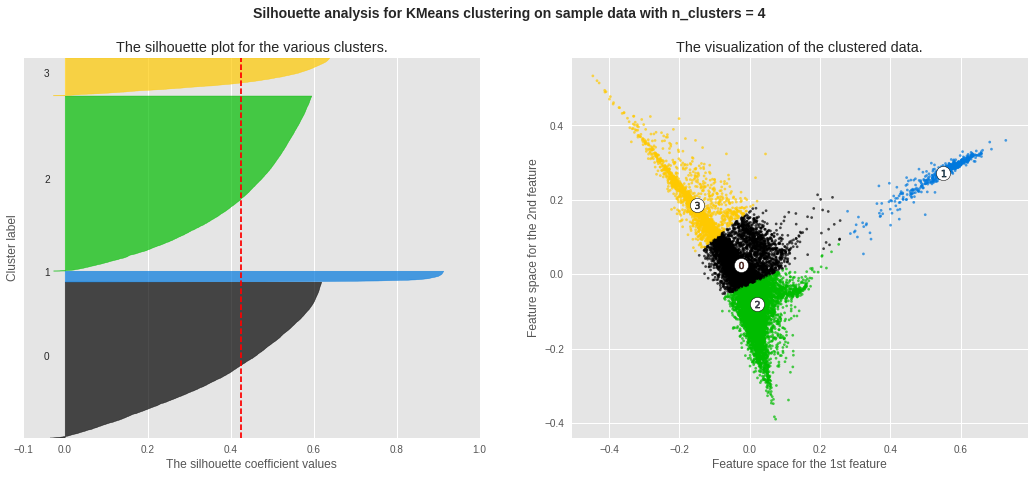

For n_clusters = 5 The average silhouette_score is : 0.44429580421940257


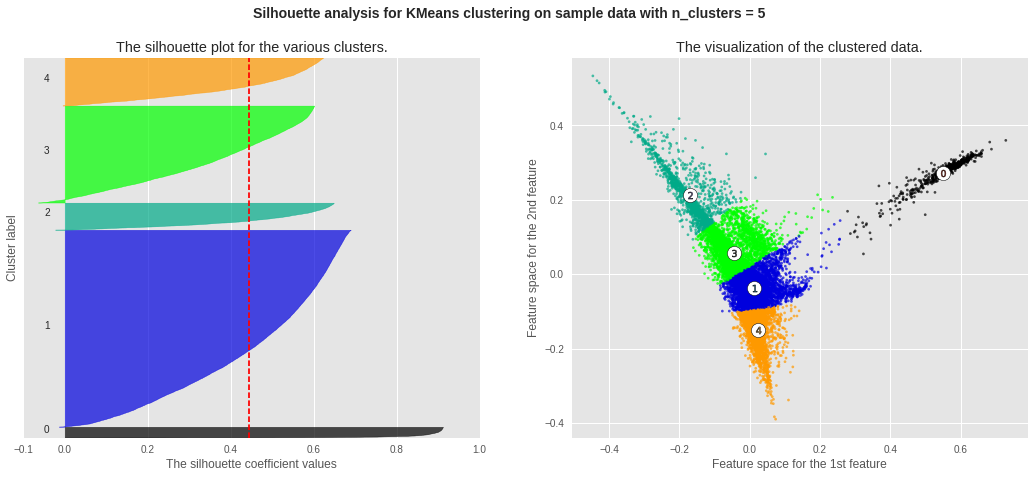

For n_clusters = 6 The average silhouette_score is : 0.41589745126808086


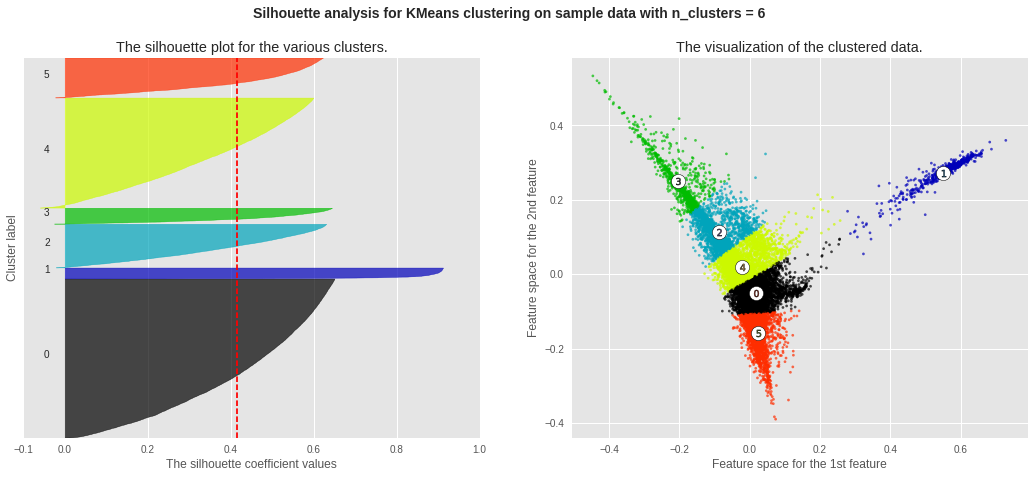

For n_clusters = 10 The average silhouette_score is : 0.39525044844640733


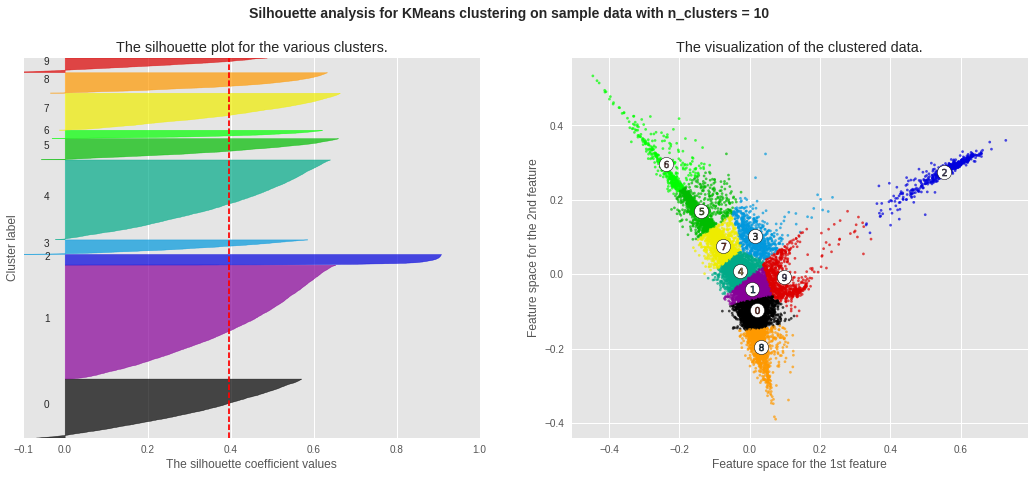

In [84]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [94]:
X = projected3
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.7434668948662544


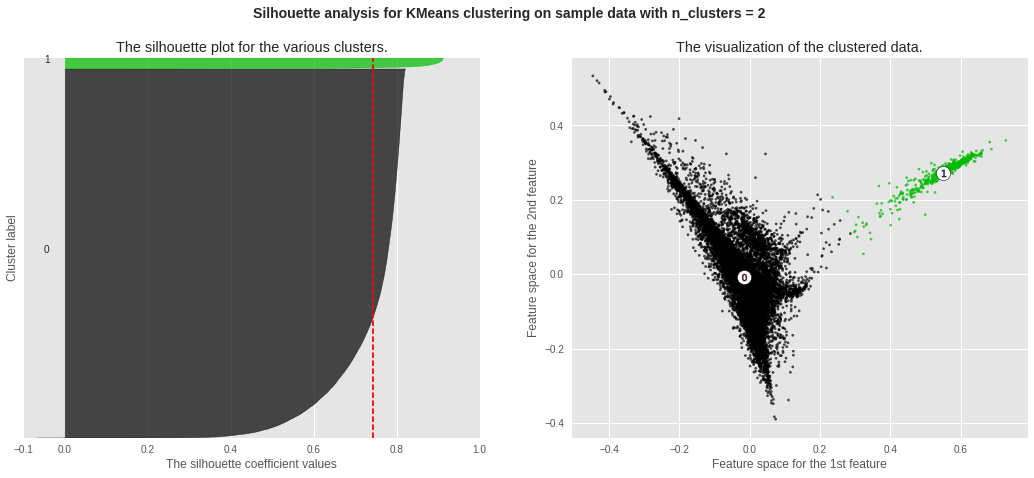

For n_clusters = 3 The average silhouette_score is : 0.522971206963233


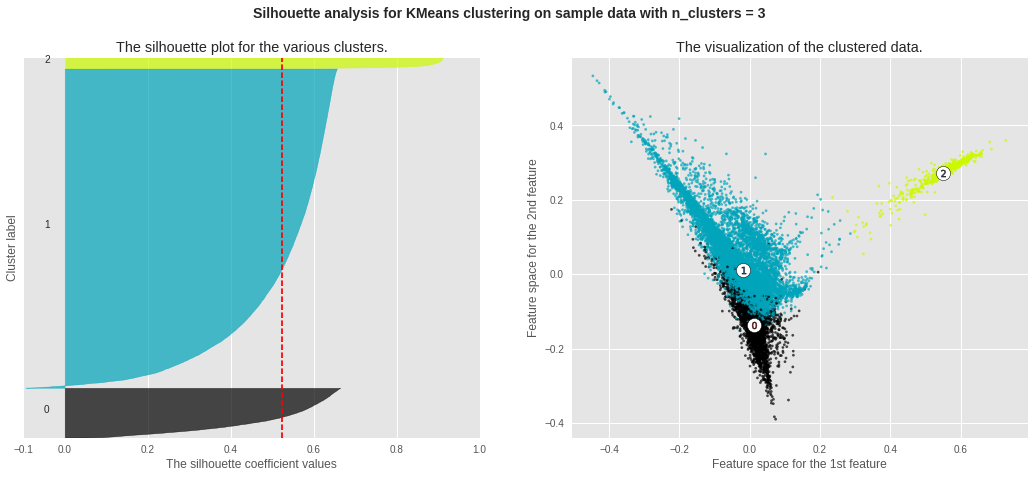

For n_clusters = 4 The average silhouette_score is : 0.547265673903126


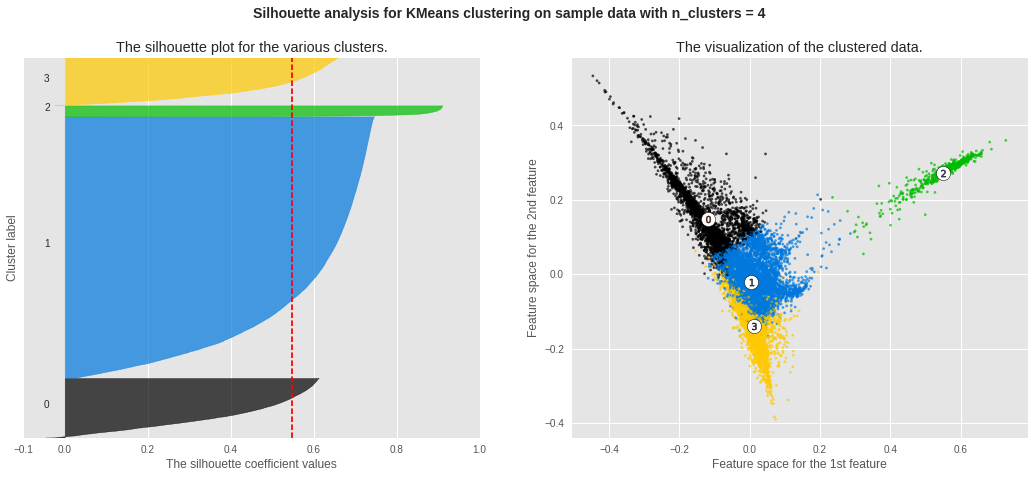

For n_clusters = 5 The average silhouette_score is : 0.4342677866629738


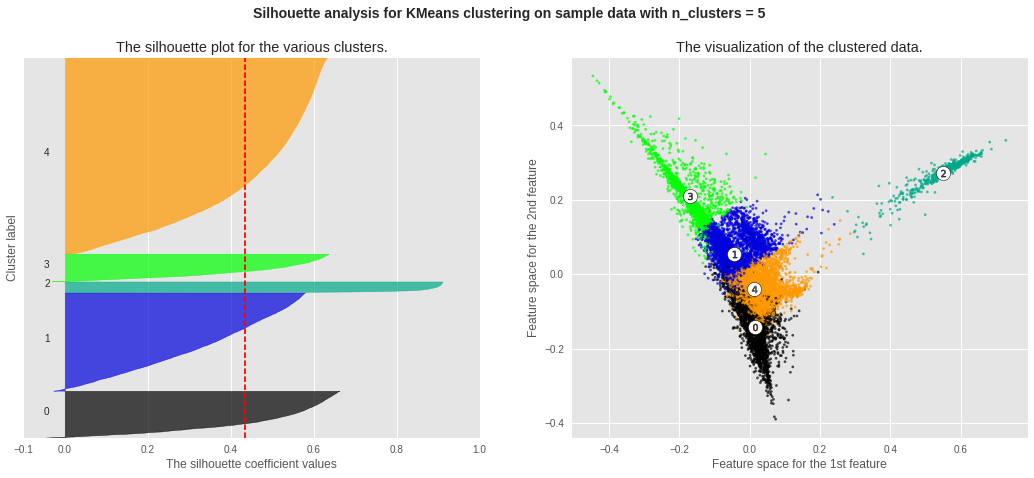

For n_clusters = 6 The average silhouette_score is : 0.42813685870343104


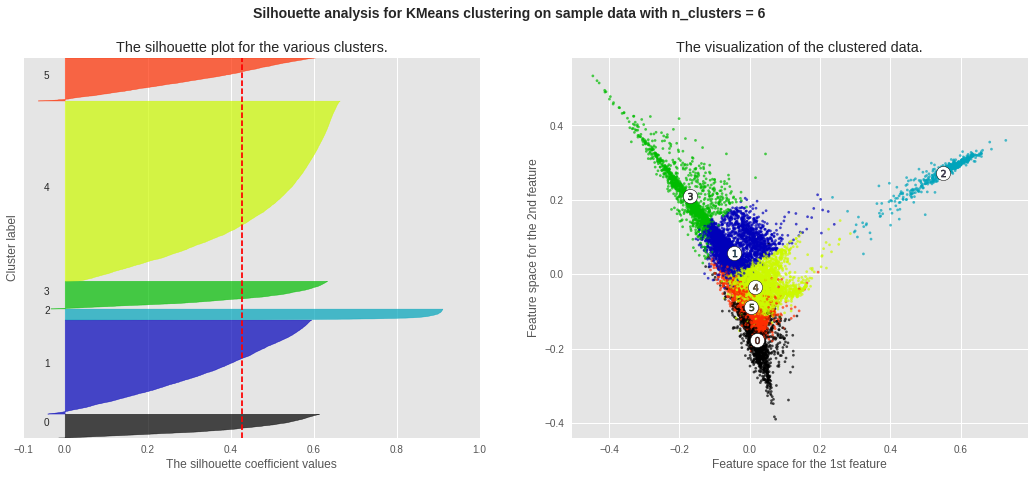

For n_clusters = 10 The average silhouette_score is : 0.3424270151060389


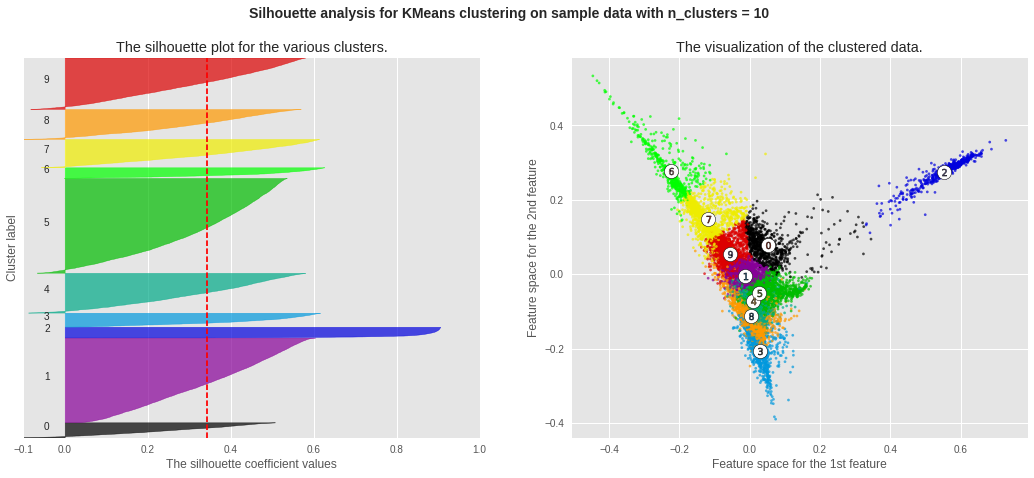

In [95]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

In [96]:
X = projected4
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.6965506238579392


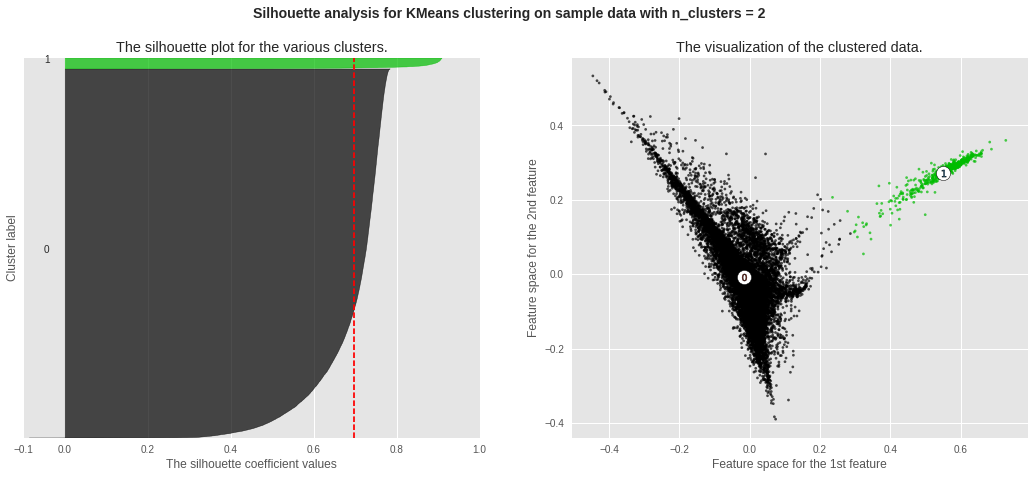

For n_clusters = 3 The average silhouette_score is : 0.4284510804994805


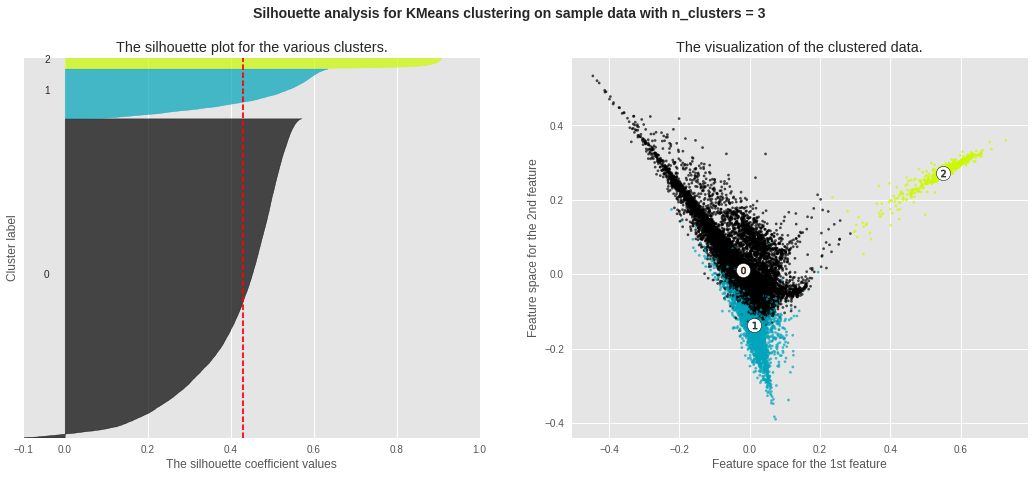

For n_clusters = 4 The average silhouette_score is : 0.4325008901298675


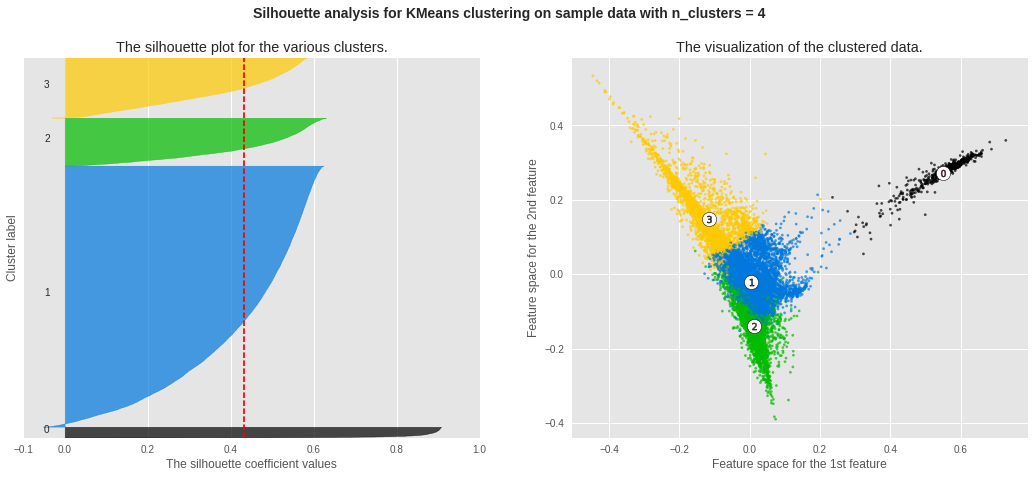

For n_clusters = 5 The average silhouette_score is : 0.3543179180628219


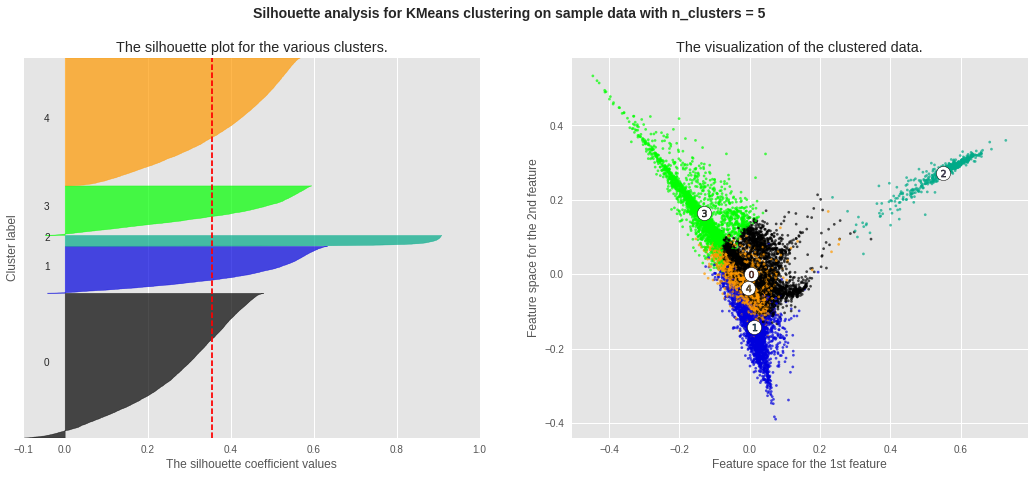

For n_clusters = 6 The average silhouette_score is : 0.3627201136315438


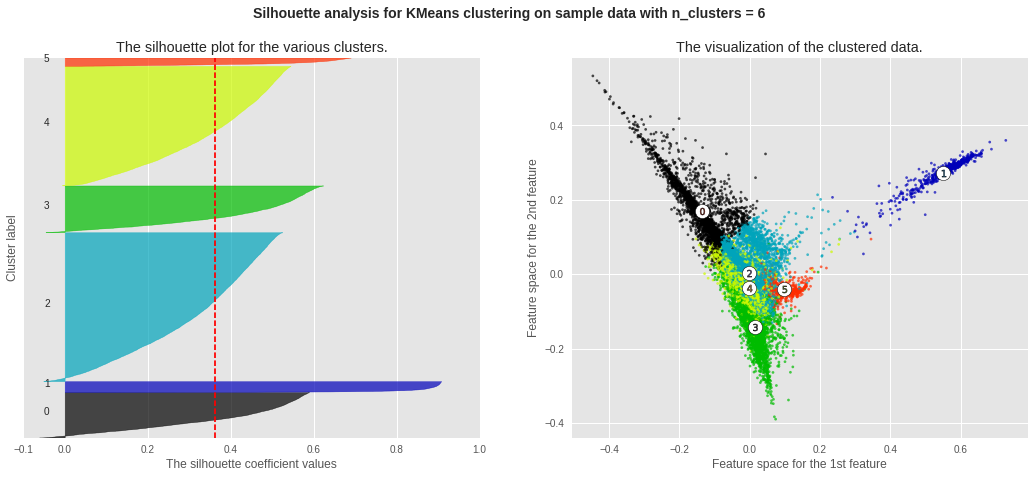

For n_clusters = 10 The average silhouette_score is : 0.30609553551117424


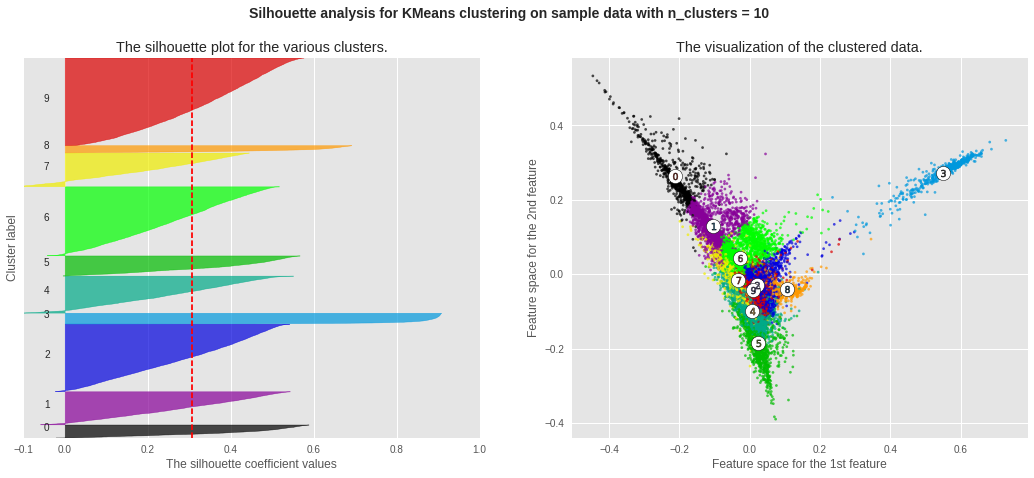

In [97]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [98]:
X = projected5
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.6719680306877853


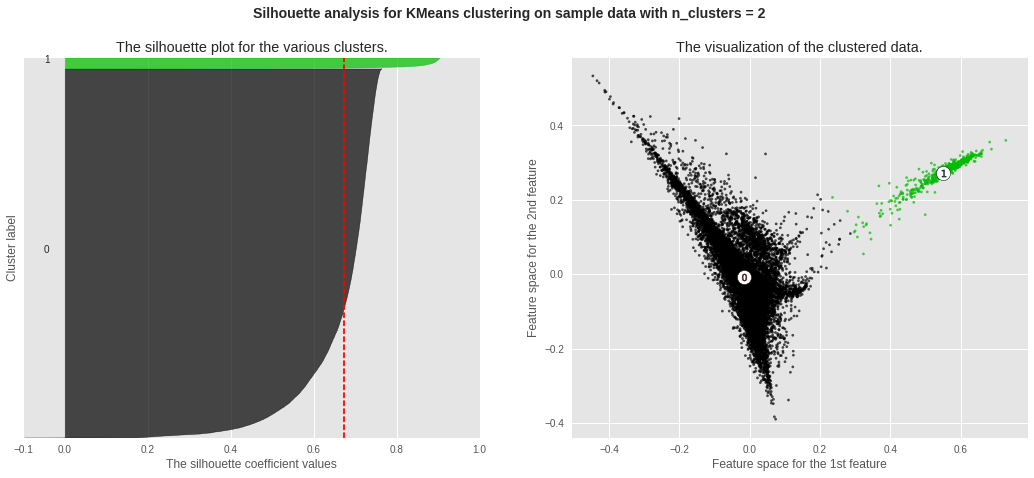

For n_clusters = 3 The average silhouette_score is : 0.38989541272412404


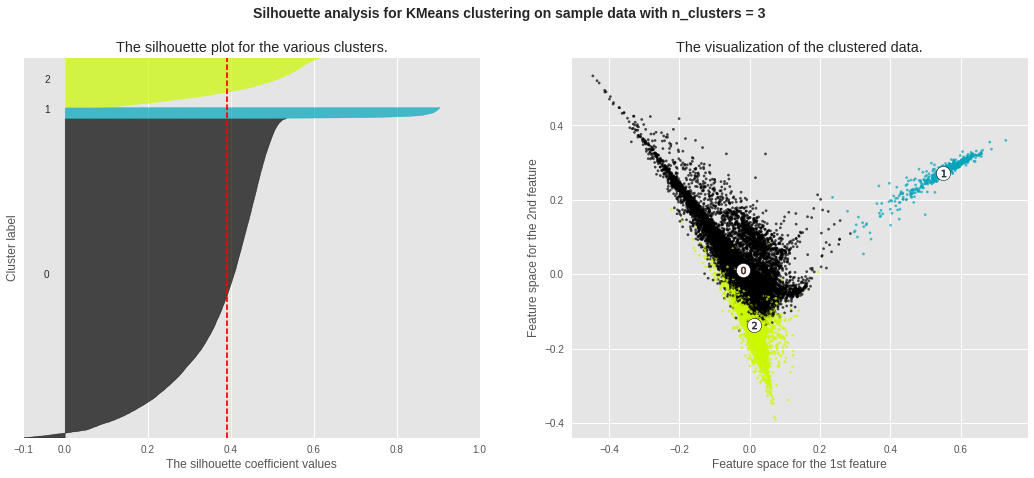

For n_clusters = 4 The average silhouette_score is : 0.39396213980056216


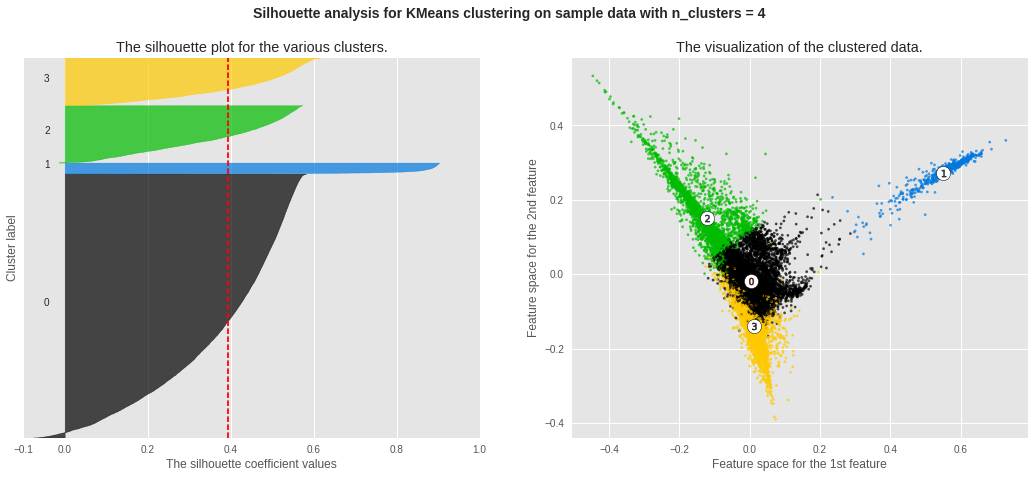

For n_clusters = 5 The average silhouette_score is : 0.42709733351631113


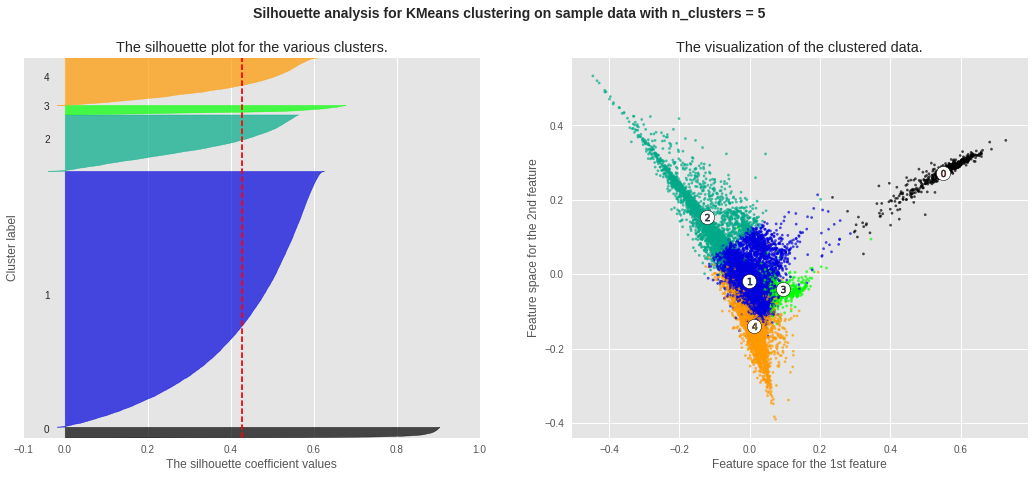

For n_clusters = 6 The average silhouette_score is : 0.3606545135351543


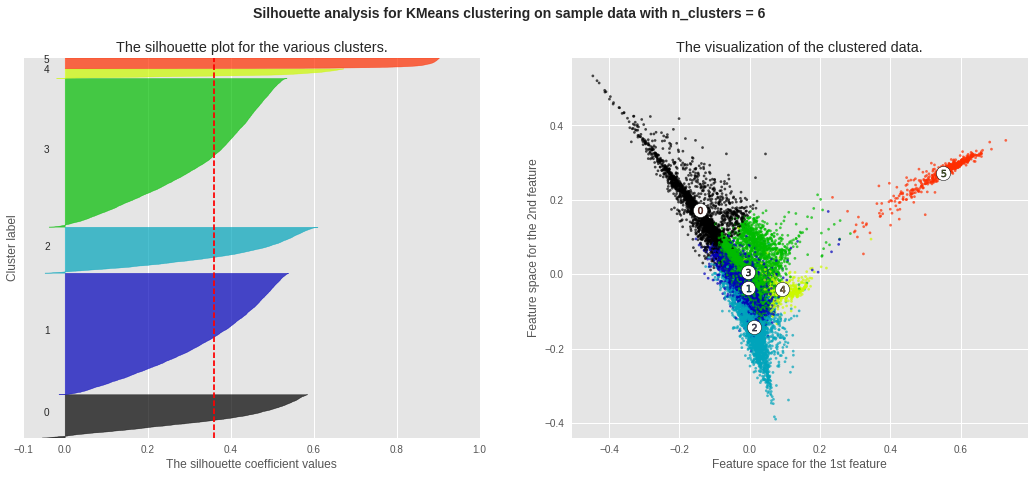

For n_clusters = 10 The average silhouette_score is : 0.31597183497529907


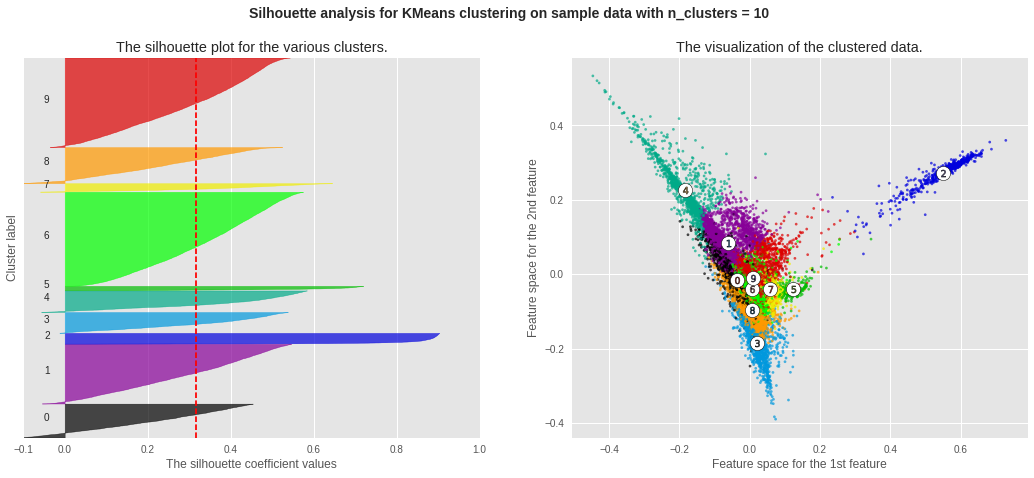

In [99]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [100]:
X = projected10
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.25767122566109935


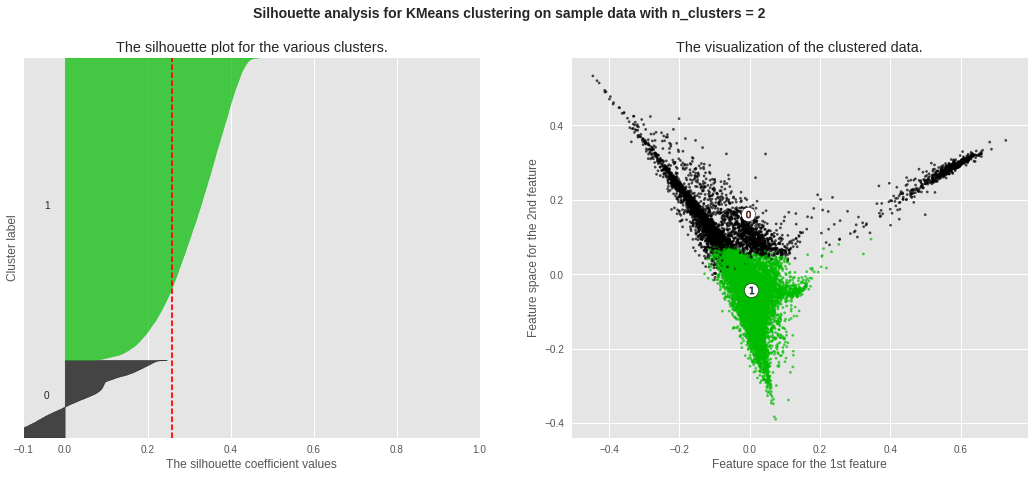

For n_clusters = 3 The average silhouette_score is : 0.2573056586482997


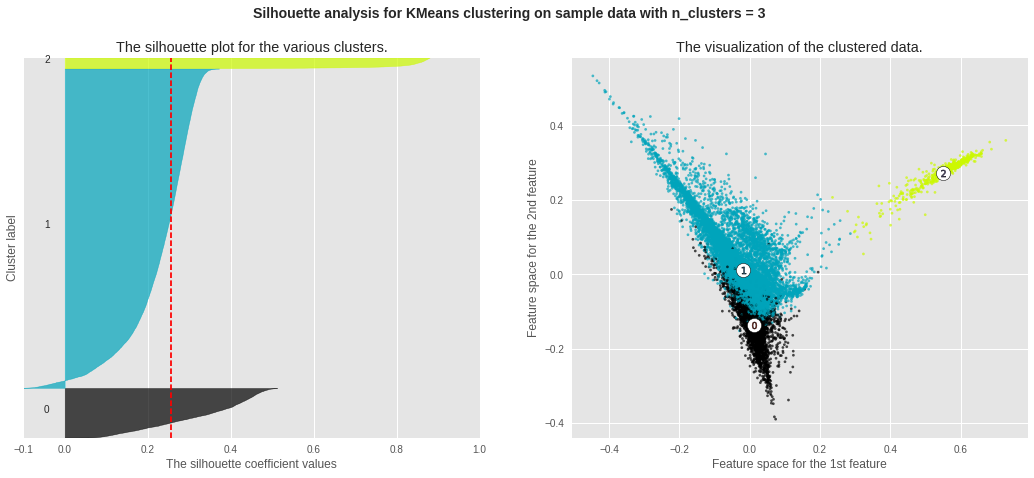

For n_clusters = 4 The average silhouette_score is : 0.2533884103424506


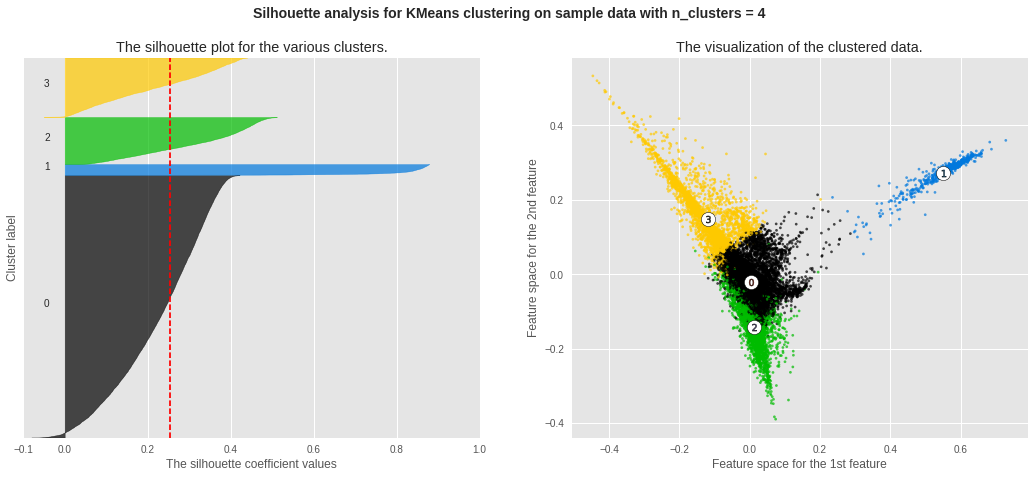

For n_clusters = 5 The average silhouette_score is : 0.2764123095255077


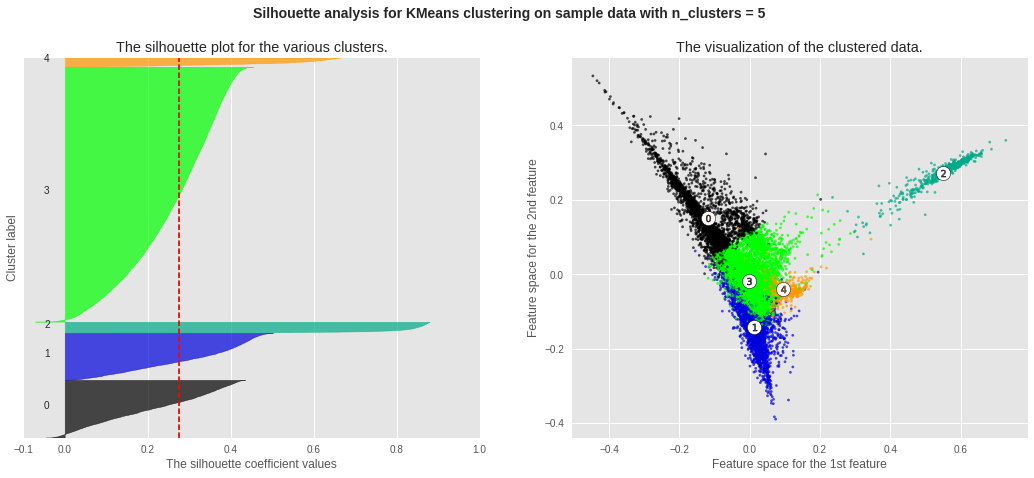

For n_clusters = 6 The average silhouette_score is : 0.20633719336397413


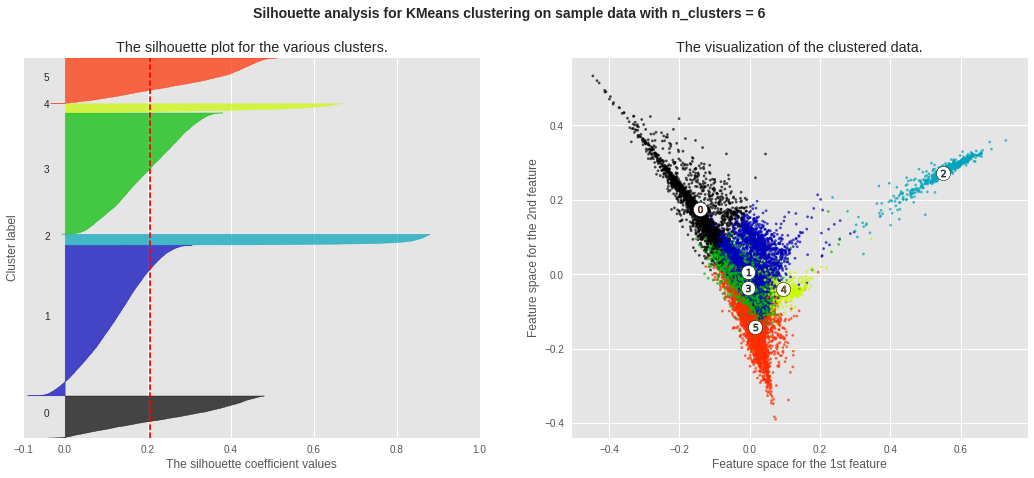

For n_clusters = 10 The average silhouette_score is : 0.2758358501546116


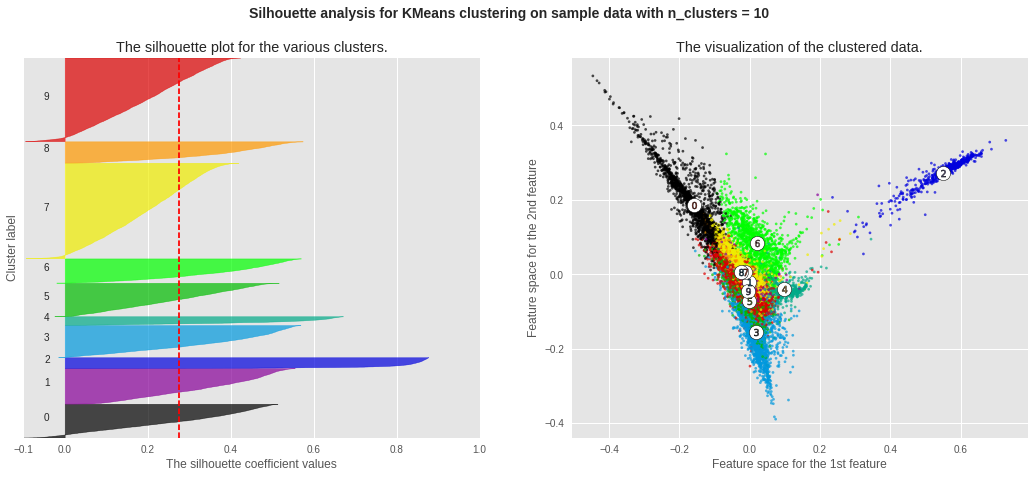

In [101]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [102]:
X = projected20
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.18210373836890187


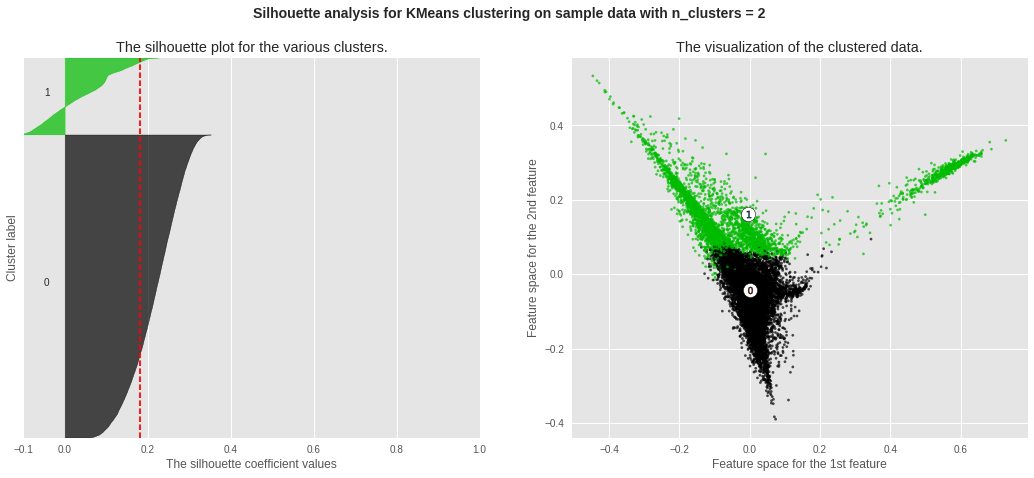

For n_clusters = 3 The average silhouette_score is : 0.16635927782127014


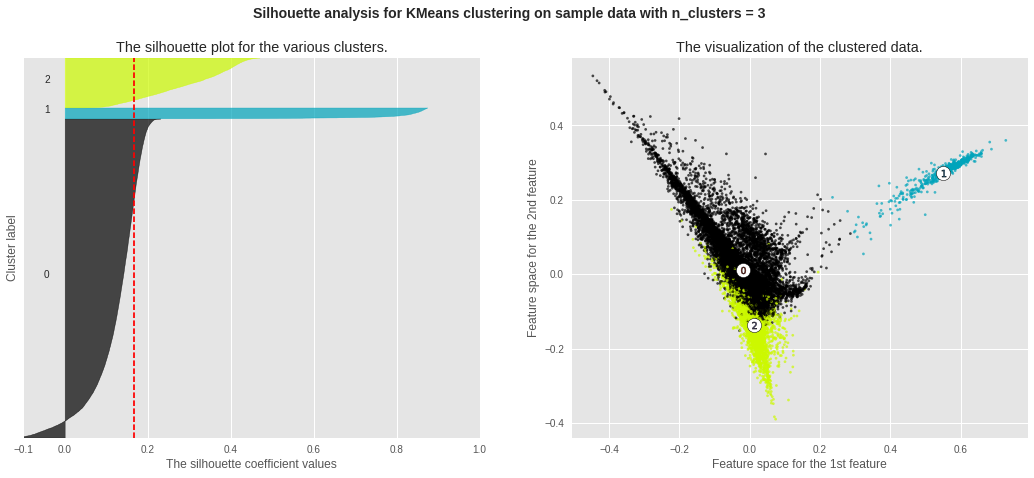

For n_clusters = 4 The average silhouette_score is : 0.171865119788226


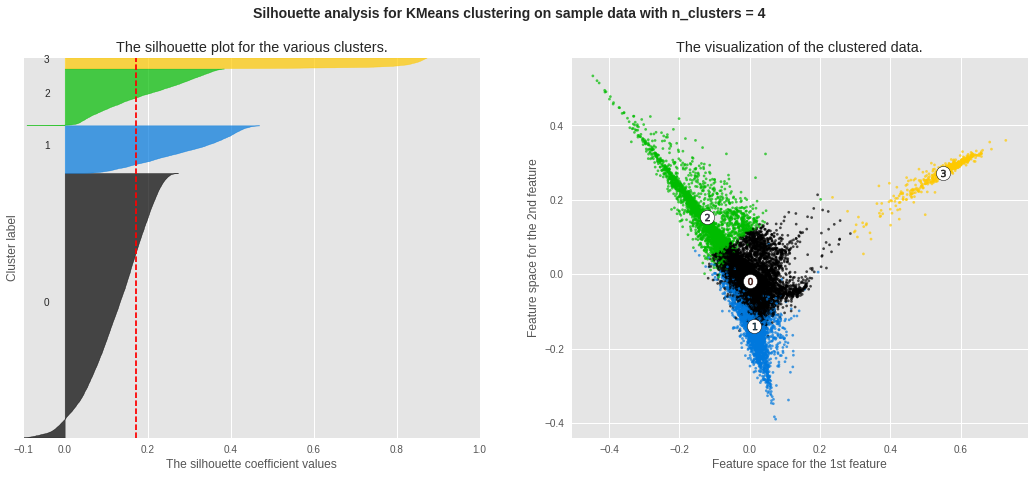

For n_clusters = 5 The average silhouette_score is : 0.1893502743193324


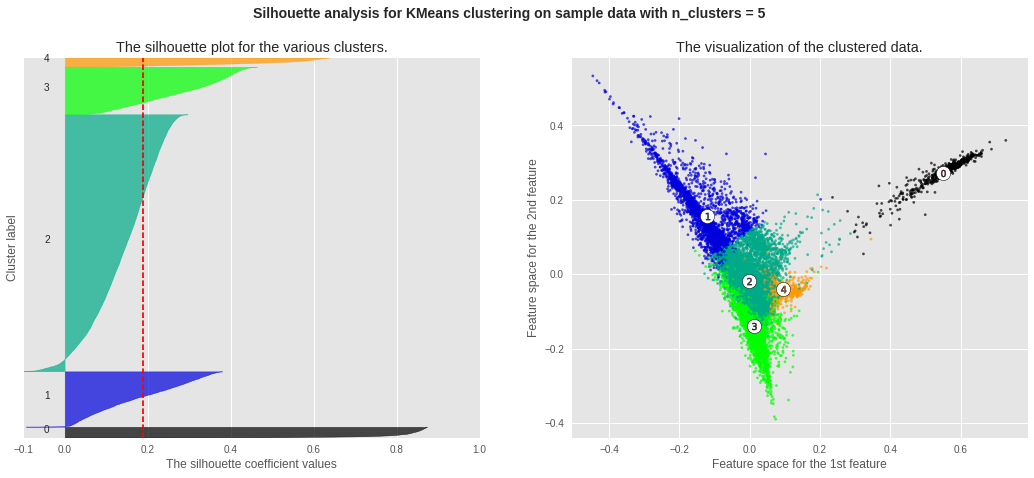

For n_clusters = 6 The average silhouette_score is : 0.1525223824039098


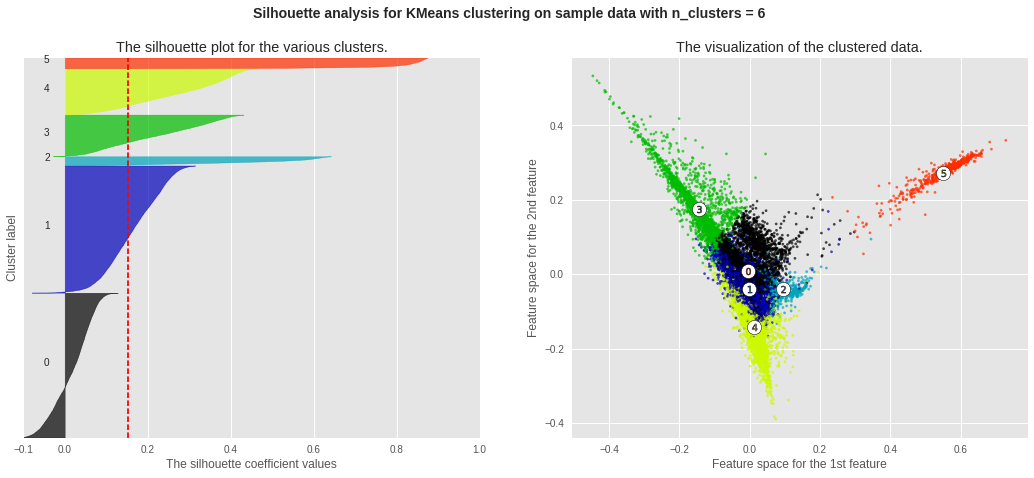

For n_clusters = 10 The average silhouette_score is : 0.2035765003119233


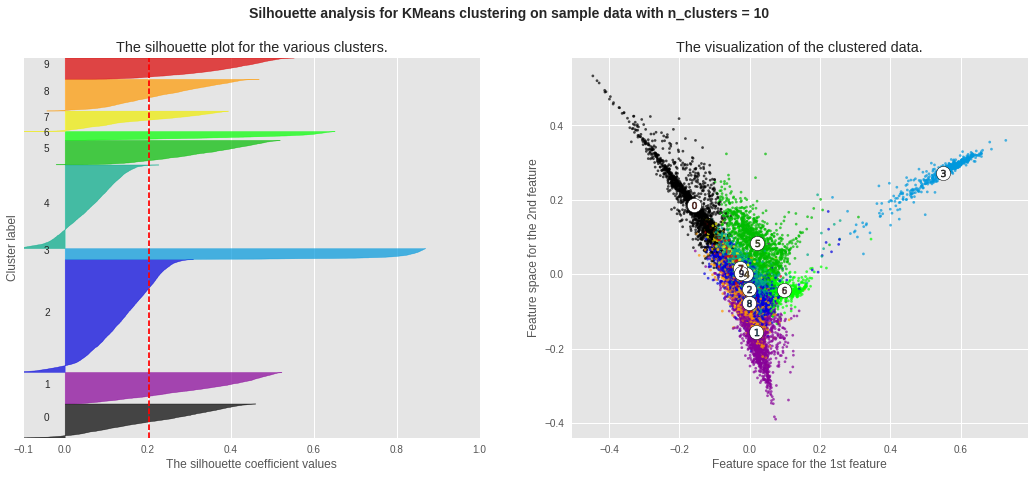

In [103]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [107]:
#Cluster with kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(lda_std)
labels = kmeans.labels_

In [49]:
klist = []
intlist = []
#finding number of cllusters
for k in range (1, 51):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    
    klist.append(k)
    intlist.append(inertia)
    
    print("k:",k, " cost:", inertia)

k: 1  cost: 5844.539344686149
k: 2  cost: 5244.887859334598
k: 3  cost: 4854.489953057318
k: 4  cost: 4488.640225603243
k: 5  cost: 4247.470036371809
k: 6  cost: 4048.9076047875774
k: 7  cost: 3902.4153222661753
k: 8  cost: 3738.2143728022706
k: 9  cost: 3597.6113832580854
k: 10  cost: 3470.2944095169637
k: 11  cost: 3353.4916145065617
k: 12  cost: 3225.4081181801107
k: 13  cost: 3148.8409005223516
k: 14  cost: 3025.2870884089075
k: 15  cost: 2948.5013226472875
k: 16  cost: 2885.7493195634092
k: 17  cost: 2795.6573759375337
k: 18  cost: 2745.887570711505
k: 19  cost: 2689.863228185115
k: 20  cost: 2647.159650319433
k: 21  cost: 2601.9966870237613
k: 22  cost: 2568.2171841706913
k: 23  cost: 2525.5170031893936
k: 24  cost: 2482.105280720403
k: 25  cost: 2445.3765396092876
k: 26  cost: 2409.0709129630723
k: 27  cost: 2369.498499990444
k: 28  cost: 2342.938085166256
k: 29  cost: 2318.631905463314
k: 30  cost: 2295.6843063356287
k: 31  cost: 2275.5884093102895
k: 32  cost: 2250.09696946438

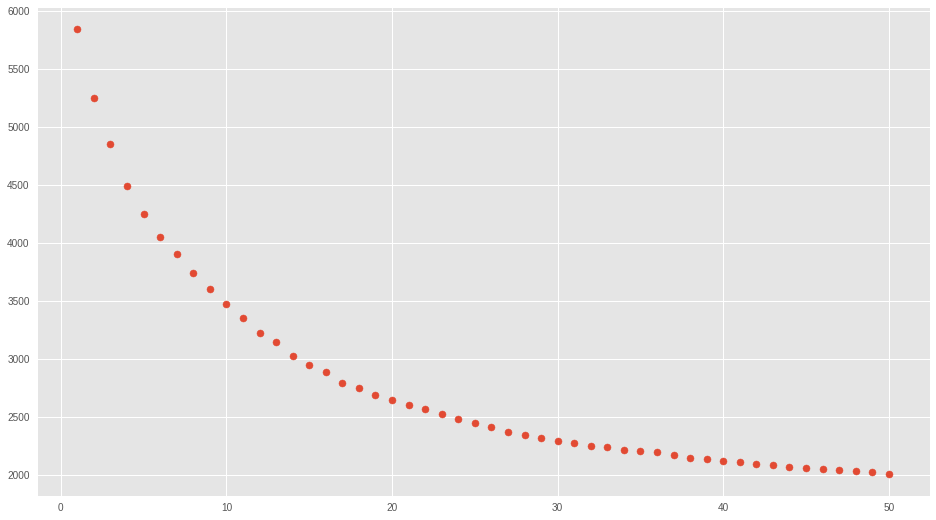

In [50]:
#plot k vs. inertia
plt.scatter(klist, intlist)

In [108]:
#Glue back to originaal data
lda_read['clusters'] = labels

In [109]:
#Add the column into our list
clmns.extend(['clusters'])

In [110]:
#Lets analyze the clusters
print(lda_read[clmns].groupby(['clusters']).mean())

           chinese      thai   healthy     smell  japanese   toronto  \
clusters                                                               
0         0.049593  0.015827  0.015677  0.001694  0.262589  0.003352   
1         0.007721  0.011639  0.014834  0.003253  0.002410  0.002382   
2         0.001492  0.002091  0.002745  0.000425  0.001779  0.002585   
3         0.153351  0.116154  0.017342  0.002916  0.008296  0.004007   
4         0.004421  0.004693  0.005397  0.003561  0.002188  0.004384   
5         0.005377  0.008420  0.014655  0.004026  0.001764  0.003766   
6         0.017540  0.014323  0.007606  0.009346  0.002413  0.003055   
7         0.011502  0.008390  0.008105  0.002719  0.004210  0.002434   
8         0.031458  0.011420  0.008610  0.001872  0.010199  0.002693   
9         0.009551  0.005191  0.018770  0.005165  0.002863  0.005673   

           service  experience  asian soup   grocery    ...         deli  \
clusters                                                ...

In [140]:
lda_read.columns

Index(['business_id', 'chinese', 'thai', 'healthy', 'smell', 'japanese',
       'toronto', 'service', 'experience', 'asian soup', 'grocery', 'parking',
       'bar ambiance', 'uk', 'good service', 'fun ambiance', 'young',
       'comfort food', 'greek', 'high end', 'hotwing', 'breakfast', 'sweet',
       'wine & dine', 'pubs', 'good taste', 'na drinks', 'desserts',
       'coffee shop', 'mexican', 'reviews', 'new york', 'general restaurant',
       'beach', 'location', 'happy hour', 'amazing', 'vietnamese', 'time',
       'vas legas', 'montreal', 'deli', 'buffet', 'bbq', 'french', 'money',
       'street taco', 'pizza', 'airport & delivery', 'burger & fries',
       'italian', 'clusters'],
      dtype='object')

In [119]:
import sklearn.cluster as cluster
import time

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [113]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [111]:
data = projected20

In [122]:
data.shape

(52810, 20)

In [123]:
data = data[:10000]

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

Can't get hdbscan to install correctly  

In [105]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
data = projected20

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})